In [1]:
import numpy as np

In [2]:
import sys
sys.path.insert(0, "/home/monica/Documents/2_ano/sistemas/si/") 
from src.si.data.dataset import Dataset
from src.si.linear_model.ridge_regression import RidgeRegression
from src.si.linear_model.logistic_regression import LogisticRegression
from src.si.model_selection.split import train_test_split
import matplotlib.pyplot as plt

from sklearn import preprocessing


In [3]:
from src.si.io_folder.module_csv import read_csv

# Avaliação Aula 5 (24/10/2022)

## Exercício 5: Completa as implementações dos modelos RidgeRegression e LogisticRegression

##### 5.1) Adiciona aos modelos anteriores o atributo (parâmetro estimado) cost_history.

- O cost_history deve ser um dicionário.
- Durante as iterações do Gradient Descent, computa a função de custo (self.cost(dataset)) e armazena o resultado no dicionário cost_history.
- A chave deve ser o número da iteração e o valor deve ser o custo nessa iteração.

##### 5.2) Realiza um gráfico (line plot) que permita visualizar o comportamento do custo em função do número de iterações.

- O eixo Y deve conter o valor de custo enquanto o eixo X deve conter as iterações. Podes usar o dicionário cost_history.
- Usa o dataset cpu.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo RidgeRegression.
- Usa o dataset breast-bin.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo LogisticRegression.

In [4]:
cpu = read_csv('/home/monica/Documents/2_ano/sistemas/si/datasets/cpu.csv', sep=',',features=True, label=True)

cpu.X = preprocessing.StandardScaler().fit_transform(cpu.X)

cpu_train, cpu_test = train_test_split(cpu)

# fit the model
model_cpu = RidgeRegression()
model_cpu.fit(cpu_train)

# get coefs
print(f"Parameters: {model_cpu.theta}")

# compute the score
score = model_cpu.score(cpu_train)
print(f"Score: {score}")

# compute the cost
cost = model_cpu.cost(cpu_train)
print(f"Cost: {cost}")

# predict
y_pred_ = model_cpu.predict(cpu_test)
print(f"Predictions: {y_pred_}")

# compute the score
score = model_cpu.score(cpu_test)
print(f"Score: {score}")

# compute the cost
cost = model_cpu.cost(cpu_test)
print(f"Cost: {cost}")


Parameters: [-2.55283709 37.2717096  48.10859281 30.20415095 16.55792328 26.54214929]
Score: 2157.7284031915706
Cost: 2174.398270044398
Predictions: [128.28148126 -15.62501224  -9.98637053 574.56628448 -12.24125782
 253.74680091  21.24738694 -28.11778447 763.73512805 256.39735715
  87.17151681 103.41442352  23.8633175   24.81010378  64.98345923
   9.6878987  120.34128905  -1.2684042  161.83413948  85.13396593
  51.17054876  28.03537716 127.66879405 -21.57357958 -41.59209717
  16.54632014 -27.77279678   2.3989512   -3.58613797  59.17324652
 255.41755053  21.12411739   2.70500394 -19.07167358 -33.08758636
  24.17444621  10.68879899 350.40321557 151.66508832 -12.16235337
 420.61782846]
Score: 4631.462293043713
Cost: 4699.768088928469


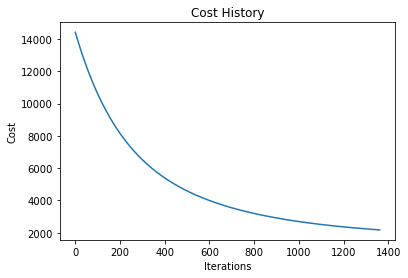

In [5]:
model_cpu.cost_plot()

In [6]:
breast_bin = read_csv('/home/monica/Documents/2_ano/sistemas/si/datasets/breast-bin.csv', sep=',',features=True, label=True)

breast_bin.X = preprocessing.StandardScaler().fit_transform(breast_bin.X)

breast_bin_train, breast_bin_test = train_test_split(breast_bin)

# fit the model    
model_b = LogisticRegression()
model_b.fit(breast_bin_train)

# get coefs
print(f"Parameters: {model_b.theta}")

# compute the score
score = model_b.score(breast_bin_train)
print(f"Score: {score}")

# compute the cost
cost = model_b.cost(breast_bin_train)
print(f"Cost: {cost}")

# predict
y_pred_ = model_b.predict(breast_bin_test)
print(f"Predictions: {y_pred_}")

# compute the score
score = model_b.score(breast_bin_test)
print(f"Score: {score}")

# compute the cost
cost = model_b.cost(breast_bin_test)
print(f"Cost: {cost}")

Parameters: [0.00103824 0.00116097 0.00115981 0.00099354 0.00096986 0.00115512
 0.00105531 0.00099401 0.00058398]
Score: 0.962432915921288
Cost: 0.6899123218907625
Predictions: [1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
Score: 0.9856115107913669
Cost: 0.6898192359156359


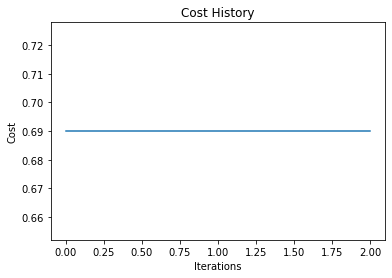

In [7]:
model_b.cost_plot()

##### 5.3) Altera agora o algoritmo de Gradient Descent. Este algoritmo deve parar quando o valor da função de custo (J/self.cost) não se altera.

- Quando a diferença entre o custo da iteração anterior e o custo da iteração atual for inferior a um determinado valor deves parar o Gradient Descent.
- No caso do RidgeRegression, o critério de paragem deve ser uma diferença inferior a 1.
- No caso do LogisticRegression, o critério de paragem deve ser uma diferença inferior a 0.0001.
- Deves usar o dicionário cost_history para obteres o custo da iteração anterior e calcular a diferença da seguinte forma: cost_history(i-1) – cost_history(i).
- Usa o dataset cpu.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo RidgeRegression
- Usa o dataset breast-bin.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo LogisticRegression

In [8]:
# Alterado (acima já tem resultados com o algoritmo a parar quando cost não muda)

##### 5.4) (OPCIONAL) Adiciona uma segunda versão do algoritmo Gradient Descent. Este algoritmo deve diminuir o valor de alfa quando a função de custo (J/self.cost) não se altera.

- Quando a diferença entre o custo da iteração anterior e o custo da iteração atual for inferior a um determinado valor deves diminuir o alfa
- No caso do RidgeRegression, o critério para alterar o alfa deve ser uma diferença inferior a 1.
- No caso do LogisticRegression, o critério para alterar o alfa deve ser uma diferença inferior a 0.0001.
- Deves diminuir o valor do alfa usando a seguinte sugestão: self.alfa = self.alfa/2
- Deves usar o dicionário cost_history para obteres o custo da iteração anterior e calcular a diferença da seguinte forma: cost_history(i-1) – cost_history(i).
- Usa o dataset cpu.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo RidgeRegression com o novo Gradient Descent
- Usa o dataset breast-bin.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo LogisticRegression com o novo Gradient Descent

In [9]:
cpu_train, cpu_test = train_test_split(cpu)

# fit the model
model_cpu = RidgeRegression(use_adaptive_alpha=True)
model_cpu.fit(cpu_train)

# get coefs
print(f"Parameters: {model_cpu.theta}")

# compute the score
score = model_cpu.score(cpu_train)
print(f"Score: {score}")

# compute the cost
cost = model_cpu.cost(cpu_train)
print(f"Cost: {cost}")

# predict
y_pred_ = model_cpu.predict(cpu_test)
print(f"Predictions: {y_pred_}")

# compute the score
score = model_cpu.score(cpu_test)
print(f"Score: {score}")

# compute the cost
cost = model_cpu.cost(cpu_test)
print(f"Cost: {cost}")


Parameters: [-2.56075663 37.26547006 48.09734574 30.20397853 16.56101774 26.53810252]
Score: 2158.7283327957457
Cost: 2175.393350397884
Predictions: [128.27301374 -15.64097231 -10.0056978  574.46429684 -12.27816508
 253.69736758  21.22924844 -28.13117148 763.62109488 256.36112325
  87.14728343 103.38658408  23.84308164  24.7938249   64.95374535
   9.6693786  120.3239081   -1.28075496 161.80076503  85.107016
  51.14335042  28.01471497 127.64164662 -21.61059605 -41.62542547
  16.52786704 -27.78956835   2.386552    -3.59878629  59.15139999
 255.37155179  21.10797809   2.69012049 -19.08163949 -33.11298223
  24.15773159  10.66127252 350.34488877 151.61811038 -12.17423321
 420.58504037]
Score: 4633.694566456487
Cost: 4701.98049224086


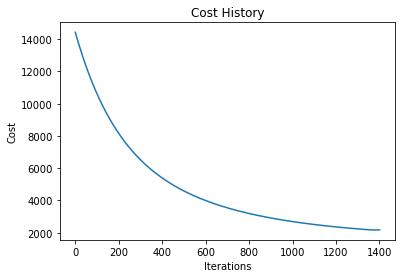

In [10]:
model_cpu.cost_plot()

In [8]:
breast_bin_train, breast_bin_test = train_test_split(breast_bin)

# fit the model    
model_b = LogisticRegression()
model_b.fit(breast_bin_train)

# get coefs
print(f"Parameters: {model_b.theta}")

# compute the score
score = model_b.score(breast_bin_train)
print(f"Score: {score}")

# compute the cost
cost = model_b.cost(breast_bin_train)
print(f"Cost: {cost}")

# predict
y_pred_ = model_b.predict(breast_bin_test)
print(f"Predictions: {y_pred_}")

# compute the score
score = model_b.score(breast_bin_test)
print(f"Score: {score}")

# compute the cost
cost = model_b.cost(breast_bin_test)
print(f"Cost: {cost}")

Parameters: [0.00103824 0.00116097 0.00115981 0.00099354 0.00096986 0.00115512
 0.00105531 0.00099401 0.00058398]
Score: 0.962432915921288
Cost: 0.6899123218907625
Predictions: [1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
Score: 0.9856115107913669
Cost: 0.6898192359156359


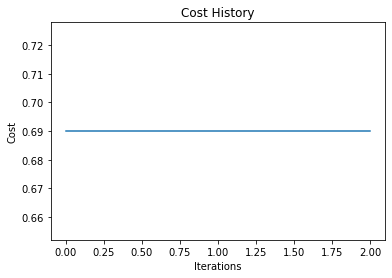

In [10]:
model_b.cost_plot()